In [1]:
import torch
from torch.utils import data
from torch import nn
import d2l.torch as d2l
import numpy as np

In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
features[0], labels[0]

(tensor([ 0.7177, -0.1216]), tensor([6.0438]))

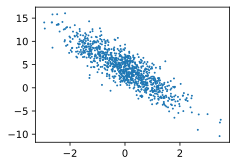

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),
                labels.detach().numpy(), 1)

In [6]:
import random

def data_iter(batch_size, features, labels):
    num_examples = features.shape[0]
    indices = list(range(num_examples))
    
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [7]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.4853,  1.2261],
        [ 0.3427,  0.3108],
        [ 0.6075, -1.1862],
        [ 0.7340, -2.1384],
        [ 0.5054, -0.9845],
        [-0.8327,  1.2995],
        [ 0.0515, -0.1795],
        [-0.3355,  0.4458],
        [-0.4599, -1.0544],
        [ 0.4982,  0.1409]]) 
 tensor([[-0.9522],
        [ 3.8133],
        [ 9.4540],
        [12.9308],
        [ 8.5562],
        [-1.8868],
        [ 4.9022],
        [ 2.0178],
        [ 6.8507],
        [ 4.7047]])


In [8]:
def linreg(X, w, b):
    return torch.matmul(X, w)+b

In [9]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [10]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [11]:
next(iter(data_iter))

[tensor([[-0.3968, -1.4198],
         [ 1.2640, -1.3293],
         [ 1.2999,  0.0543],
         [-0.0431,  0.0298],
         [-0.7184,  0.7921],
         [ 0.6504, -2.4238],
         [ 0.1305, -1.4784],
         [-0.1814,  0.6177],
         [-0.1275,  0.9520],
         [ 1.9336,  1.7821]]),
 tensor([[ 8.2333],
         [11.2619],
         [ 6.5977],
         [ 4.0235],
         [ 0.0681],
         [13.7306],
         [ 9.4813],
         [ 1.7407],
         [ 0.7051],
         [ 2.0047]])]

In [12]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

net = nn.Sequential(nn.Linear(2, 1))

# Weights initialization
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

LR = 0.03
trainer = torch.optim.SGD(net.parameters(), lr=LR)
# loss = nn.MSELoss()
loss = nn.SmoothL1Loss()
# loss = nn.MSELoss(reduction='sum')

In [13]:
np.random.seed(868990)
torch.manual_seed(868990)

epoches = 3
print(features.shape)

for epoch in range(epoches):
    for batch_X, batch_y in data_iter:
        l = loss(net(batch_X), batch_y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels) 
    print(f'epoch {epoch+1}, loss: {l:f}')

torch.Size([1000, 2])
epoch 1, loss: 2.250306
epoch 2, loss: 0.423354
epoch 3, loss: 0.001421


In [144]:
net[0].weight.grad

tensor([[-0.2118,  0.2394]])

In [14]:
np.array([1, 2])

array([1, 2])